In [8]:
import pandas as pd
from sklearn.decomposition import PCA
soil_filtered=pd.read_csv("dataset1.csv")

In [9]:
soil.head()

NameError: name 'soil' is not defined

In [10]:
soil.nunique()

NameError: name 'soil' is not defined

In [11]:
soil.isna()

NameError: name 'soil' is not defined

In [12]:
soil.dtypes

NameError: name 'soil' is not defined

In [13]:
soil_filtered= soil_filtered.astype({'N': float, 'K': float})

In [14]:
soil_filtered.dtypes

N           float64
P           float64
K           float64
pH          float64
EC          float64
OC          float64
S           float64
Zn          float64
Fe          float64
Cu          float64
Mn          float64
B           float64
Output        int64
Microbes     object
dtype: object

In [15]:
from sklearn.preprocessing import LabelEncoder
l = LabelEncoder()
soil_filtered['label']=soil_filtered['Microbes']
soil_filtered.label = l.fit_transform(soil_filtered.Microbes)
soil_filtered

,N,P,K,pH,EC,OC,S,Zn,Fe,Cu,Mn,B,Output,Microbes,label
0,138.0,8.6,560.0,7.46,0.62,0.70,5.90,0.24,0.31,0.77,8.71,0.11,0,Nitrosomonus,3
1,213.0,7.5,338.0,7.62,0.75,1.06,25.40,0.30,0.86,1.54,2.89,2.29,0,Nitrobacter,2
2,163.0,9.6,718.0,7.59,0.51,1.11,14.30,0.30,0.86,1.57,2.70,2.03,0,Nitrobacter,2
3,157.0,6.8,475.0,7.64,0.58,0.94,26.00,0.34,0.54,1.53,2.65,1.82,0,Nitrobacter,2
4,270.0,9.9,444.0,7.63,0.40,0.86,11.80,0.25,0.76,1.69,2.43,2.26,1,No Microbe,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
875,351.0,10.7,623.0,7.96,0.51,0.29,7.24,0.36,4.69,0.69,11.03,0.69,1,No Microbe,4
876,264.0,9.0,486.0,7.24,0.47,0.10,3.92,0.35,8.26,0.45,7.98,0.40,1,No Microbe,4
877,276.0,9.2,370.0,7.62,0.62,0.49,6.64,0.42,3.57,0.63,6.48,0.32,1,No Microbe,4
878,320.0,13.8,391.0,7.38,0.65,1.07,5.43,0.58,4.58,1.02,13.25,0.53,2,No Microbe,4


In [16]:
soil_filtered.sort_values(by="label",ascending=True,inplace=True)

In [17]:
# Q1 = soil.quantile(0.25)
# Q3 = soil.quantile(0.75)
# IQR=Q3-Q1
# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR
# soil_filtered = soil[~((soil < lower_bound) | (soil > upper_bound)).any(axis=1)]

<ipython-input-18-ab41c7df888c>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(soil_filtered.corr(), annot=True, cmap='coolwarm', fmt='.2f')


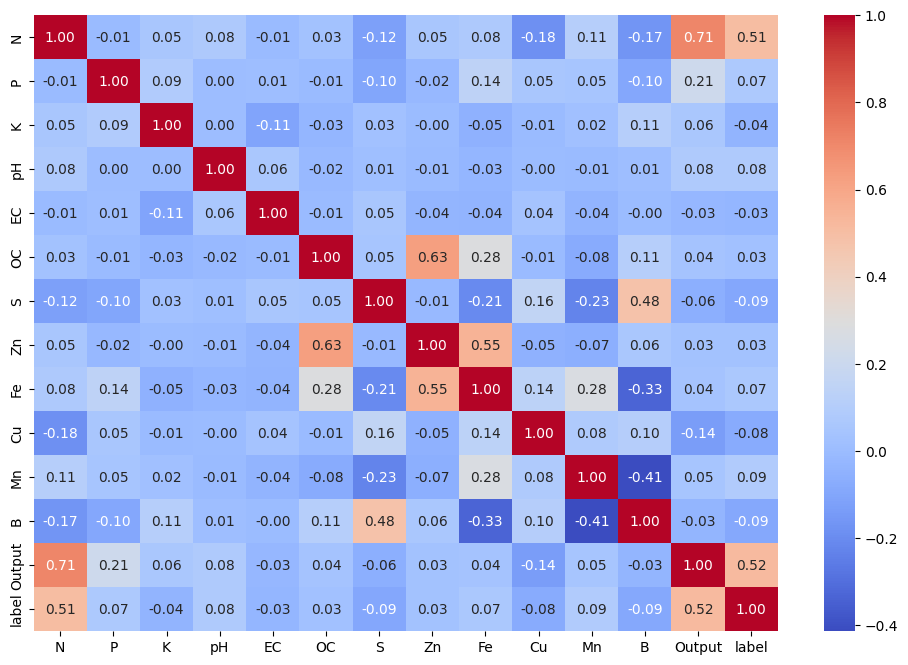

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 8))
sns.heatmap(soil_filtered.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X = soil_filtered.drop(['Output','Microbes','label'],axis=1)
y = soil_filtered[['Output']]
scale=StandardScaler()
X_scaled=scale.fit_transform(X)


In [20]:
unique_microbes = soil_filtered['Microbes'].unique()
print(unique_microbes)
unique_label = soil_filtered['label'].unique()
print(unique_label)


['Azotobacter' 'Mycorrhiza' 'Nitrobacter' 'Nitrosomonus' 'No Microbe'
 'Rhizobium']
[0 1 2 3 4 5]


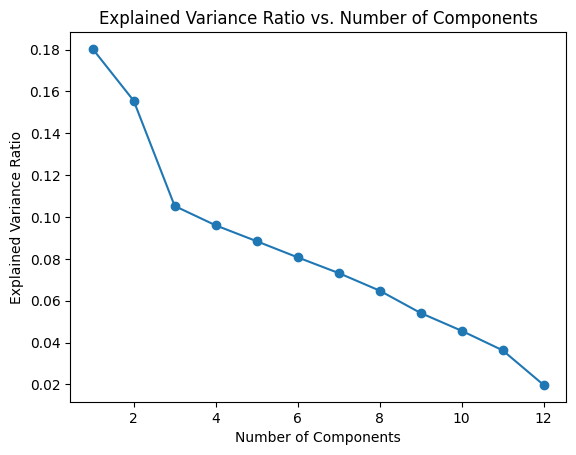

[0.18027688 0.15552903 0.10523813 0.09600343 0.08841718 0.08070505
 0.07320883 0.06480223 0.05412831 0.04562215 0.03630475 0.01976402]


0.9802359765987639

In [21]:
pca=PCA()
x_pca=pca.fit_transform(X_scaled)
explained_variance_ratio = pca.explained_variance_ratio_
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio vs. Number of Components')
plt.show()
print(explained_variance_ratio)
sum(explained_variance_ratio[0:11])

In [22]:
variances = x_pca.var(axis=0)
threshold=0.
selected_features = X.columns[variances > threshold]
X_filtered = X[selected_features]
pca=PCA()
x_pca=pca.fit_transform(X_filtered)


In [23]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2)

In [24]:
dict_fertility={0:"Not Fertile",1:"Fertile"}
import pickle
with open('fertility.pkl', 'wb') as file:
    pickle.dump(dict_fertility, file)

In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 1. Model Initialization
KNN = KNeighborsClassifier(n_neighbors=3, p=2)

# 2. Data Preparation
# Assuming X_train, X_test are your feature matrices, and y_train, y_test are your labels
# You can load your data from CSV or any other source and prepare them accordingly
# X_train, X_test, y_train, y_test = ...

# 3. Model Training
KNN.fit(X_train, y_train)

# 4. Model Evaluation
y_pred = KNN.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Additionally, you can use other metrics for evaluation such as precision, recall, etc.

# 5. Predictions
# Assuming new_sample is a new data point you want to predict the label for
# new_sample = ...
# predicted_label = KNN.predict(new_sample)


Accuracy: 0.8522727272727273


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

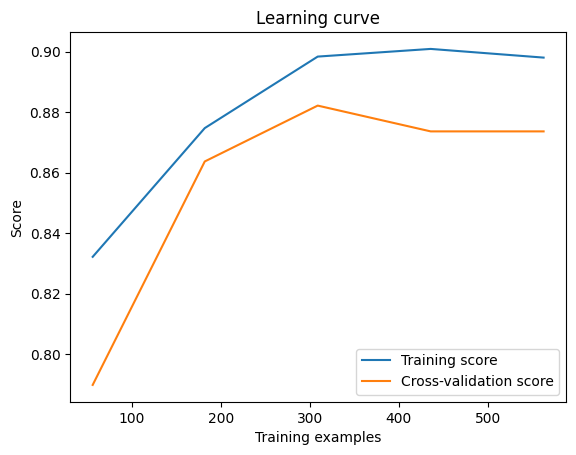

In [26]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(KNeighborsClassifier(n_neighbors=5, p=2), X_train, y_train, cv=5)

plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Cross-validation score')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.title('Learning curve')
plt.legend()
plt.show()

In [27]:
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier as rf
import pickle

rf_classifier = rf(n_estimators=12,max_depth=120,random_state=1)
rf_classifier.fit(X_train,y_train)
predicted_values = rf_classifier.predict(X_test)
x = metrics.accuracy_score(y_test, predicted_values)
acc=[]
model=[]
acc.append(x)
model.append('Random Forest')
print("Random Forest's Accuracy is: ", x)

print(classification_report(y_test,predicted_values))

Random Forest's Accuracy is:  0.9034090909090909
              precision    recall  f1-score   support

           0       0.93      0.95      0.94        75
           1       0.88      0.95      0.91        93
           2       0.00      0.00      0.00         8

    accuracy                           0.90       176
   macro avg       0.60      0.63      0.62       176
weighted avg       0.86      0.90      0.88       176



In [28]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(rf(n_estimators=500, max_depth=120,random_state=42), X_train, y_train, cv=5)

plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Cross-validation score')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.title('Learning curve')
plt.legend()
plt.show()

KeyboardInterrupt: 

In [24]:
with open('soil_analysis.pkl', 'wb') as file:
    pickle.dump(rf_classifier, file)


In [29]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
gbc=GradientBoostingClassifier()
gbc.fit(X_train,y_train)


GradientBoostingClassifier()

In [30]:
from sklearn import linear_model
logr = linear_model.LogisticRegression()
logr.fit(X_train,y_train)
predicted = logr.predict(X_test)
print(predicted)
x = accuracy_score(y_test, predicted)
print(x)
with open('soil_analysis.pkl', 'wb') as file:
    pickle.dump(logr, file, protocol=4)

[1 0 1 1 0 0 1 1 1 0 1 1 0 2 1 1 1 0 0 1 1 0 1 0 0 1 1 0 0 0 0 1 0 1 1 1 1
 0 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 0 1 1 1 1 0 2 0 0 1 0 1 0 1 1 1 1 1 1 0 1
 1 1 1 0 0 1 1 1 1 0 0 1 1 2 1 1 1 1 1 1 0 1 1 2 1 1 0 1 0 1 0 0 1 1 0 1 1
 1 1 1 1 1 1 1 1 0 1 0 1 0 0 0 1 1 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 1 1 1 1 0
 0 0 0 1 1 1 0 1 1 1 1 0 0 0 1 1 0 0 0 0 1 1 0 1 0 1 1 0]
0.8693181818181818


In [31]:
y_pred=gbc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
with open('soil_analysis.pkl', 'wb') as file:
    pickle.dump(gbc, file, protocol=4)

Accuracy: 0.9034090909090909


In [32]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(GradientBoostingClassifier(), X_train, y_train, cv=5)

plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Cross-validation score')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.title('Learning curve')
plt.legend()
plt.show()

KeyboardInterrupt: 

In [33]:
from sklearn.svm import SVC
svm_classifier = SVC(kernel='linear', random_state=1)
svm_classifier.fit(X_train, y_train)
y_pred = svm_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
with open('soil_analysis.pkl', 'wb') as file:
    pickle.dump(svm_classifier, file, protocol=4)

Accuracy: 0.8863636363636364


In [34]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(SVC(kernel='linear', random_state=42), X_train, y_train, cv=5)

plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Cross-validation score')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.title('Learning curve')
plt.legend()
plt.show()

KeyboardInterrupt: 

In [35]:
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Define base classifiers
base_classifiers = [
    SVC(kernel='poly', random_state=1),
    KNeighborsClassifier(),
    LogisticRegression()
]

# Create a list to store the bagging classifiers
bagging_classifiers = []

# Create a BaggingClassifier for each base classifier
for base_classifier in base_classifiers:
    bagging_classifier = BaggingClassifier(base_estimator=base_classifier, n_estimators=10, random_state=42)
    bagging_classifiers.append(bagging_classifier)

# Fit and predict with each bagging classifier
for i, bagging_classifier in enumerate(bagging_classifiers):
    bagging_classifier.fit(X_train, y_train)
    y_pred = bagging_classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Bagging Classifier {i+1} - Accuracy: {accuracy}")


Bagging Classifier 1 - Accuracy: 0.8693181818181818
Bagging Classifier 2 - Accuracy: 0.8522727272727273
Bagging Classifier 3 - Accuracy: 0.8409090909090909


In [36]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
clf = MLPClassifier(hidden_layer_sizes=(64,),activation='logistic' ,max_iter=1000, alpha=1e-3,
                    solver='sgd', verbose=2, random_state=42,
                    learning_rate_init=0.0001)
scores = cross_val_score(clf, X, y, cv=5)
print("Mean cross-validation score:", scores.mean())
clf.fit(X, y)
predictions = clf.predict(X_test)
print(predictions)
test_accuracy = accuracy_score(y_test, predictions)
print(f"Test Accuracy: {test_accuracy}")

Iteration 1, loss = 1.10492811
Iteration 2, loss = 1.07832196
Iteration 3, loss = 1.06009044
Iteration 4, loss = 1.03368250
Iteration 5, loss = 1.00884922
Iteration 6, loss = 0.98699298
Iteration 7, loss = 0.96758925
Iteration 8, loss = 0.95189991
Iteration 9, loss = 0.93801130
Iteration 10, loss = 0.92699473
Iteration 11, loss = 0.91673461
Iteration 12, loss = 0.90736731
Iteration 13, loss = 0.89870428
Iteration 14, loss = 0.88998802
Iteration 15, loss = 0.88222600
Iteration 16, loss = 0.87509762
Iteration 17, loss = 0.86819934
Iteration 18, loss = 0.86217686
Iteration 19, loss = 0.85642778
Iteration 20, loss = 0.85100878
Iteration 21, loss = 0.84569238
Iteration 22, loss = 0.84084931
Iteration 23, loss = 0.83589966
Iteration 24, loss = 0.83137290
Iteration 25, loss = 0.82710142
Iteration 26, loss = 0.82220305
Iteration 27, loss = 0.81725364
Iteration 28, loss = 0.81135745
Iteration 29, loss = 0.80320726
Iteration 30, loss = 0.79526012
Iteration 31, loss = 0.79151907
Iteration 32, los

In [37]:
import numpy as np
data=np.array([[333,20.8,370,7.45,0.55,0.2,4.83,0.55,8.32,1.25,12.03,0.5]])
predictions=gbc.predict(data)
print(predictions)


[2]


In [ ]:
import numpy as np
data=np.array([[163,9.6,560,7.45,0.51,1.11,14.3,0.3,0.86,1.57,2.7,2.03]])
predictions=gbc.predict(data)
print(predictions)


[3]


<Axes: title={'center': 'Accuracy Comparision'}, xlabel='accuracy_scores', ylabel='model_names'>

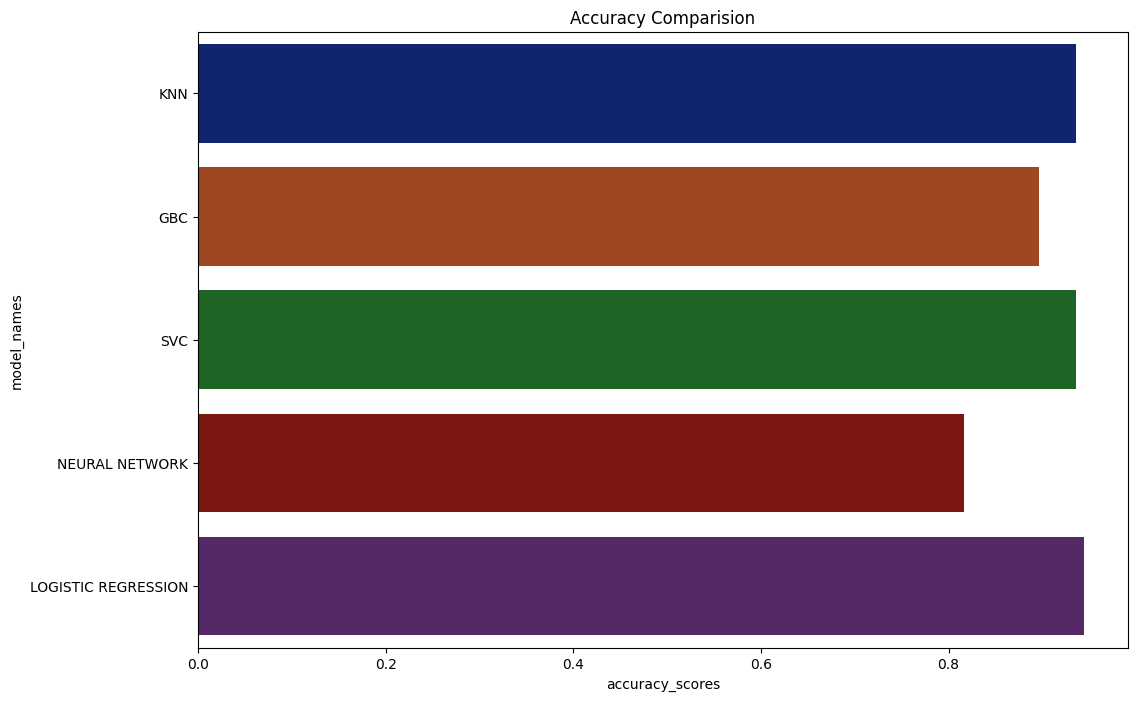

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sample accuracy scores (replace this with your actual accuracy scores)
accuracy_scores = [0.936,0.896,0.936,0.816,0.944]

# Labels for the bars
model_names = ['KNN', 'GBC', 'SVC','NEURAL NETWORK','LOGISTIC REGRESSION']

plt.figure(figsize = [12,8],dpi = 100)
plt.title('Accuracy Comparision')
plt.xlabel('accuracy_scores')
plt.ylabel('model_names')
sns.barplot(x = accuracy_scores,y = model_names,palette='dark')


